## Data EDA

셀이 순서대로 되어있다거 보장 할 수 없습니다 ㅎㅎ.

In [1]:
import os.path as p
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_from_disk, load_dataset
from konlpy.tag import Mecab

from transformers import AutoConfig, AutoTokenizer, AutoModelForQuestionAnswering

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import sys
sys.path.append("/opt/ml/code/")

In [4]:
mecab = Mecab()

/usr/local/lib/mecab/dic/mecab-ko-dic
/opt/conda/lib/python3.7/site-packages/konlpy


In [5]:
kor_datasets = load_dataset('squad_kor_v1')

Reusing dataset squad_kor_v1 (/opt/ml/.cache/huggingface/datasets/squad_kor_v1/squad_kor_v1/1.0.0/31982418accc53b059af090befa81e68880acc667ca5405d30ce6fa7910950a7)


In [8]:
mrc_datasets = load_from_disk('/opt/ml/input/data/train_dataset/')

In [9]:
mrc_train_dataset = mrc_datasets['train']
mrc_valid_dataset = mrc_datasets['validation']

kor_train_dataset = kor_datasets['train']
kor_valid_dataset = kor_datasets['validation']

In [10]:
mrc_train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [11]:
kor_train_dataset[0]

{'answers': {'answer_start': [54], 'text': ['교향곡']},
 'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.',
 'id': '6566495-0-0',
 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?',
 'title': '파우스트_서곡'}

In [12]:
model_name = 'monologg/kobert'
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForQuestionAnswering.from_pretrained(model_name, config=config)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
pad_on_right = tokenizer.padding_side == "right"

In [587]:
tokenizer.model_max_length

512

#### 여러가지 Feature들 고려해서 DataFrame 생성

- doc dataframe
    - id
    - document_id
    - context 길이
    - question 길이
    - answer 길이
- sentence dataframe
    - id, sentence, sentence length
    - sentence
    - sentence length
    - answer 포함 여부 ( 그냥... answer가 포함되는 문장의 길이는 얼마인지 궁금해서 )
    - 

#### Answer가 Document의 어느 위치쯤에 분포하는지 시각화

> mrc_dataset, kor_dataset 비교

In [15]:
def get_doc_ans_length(dataset):
    doc_len = []
    ans_len = []

    for data in dataset:
        doc_len.append(len(data['context']))
        start_char = data['answers']['answer_start'][0]
        end_char = start_char + len(data['answers']["text"][0])
        ans_len.append((start_char, end_char))
    
    return doc_len, ans_len

In [16]:
doc_len, ans_len = get_doc_ans_length(mrc_train_dataset)
ans_start, ans_end = zip(*ans_len)
y_data = list(range(len(doc_len)))

In [30]:
datasets = [mrc_train_dataset, mrc_valid_dataset, kor_train_dataset, kor_valid_dataset]
names = ["mrc_train_dataset", "mrc_valid_dataset", "kor_train_dataset", "kor_valid_dataset"]

In [594]:
doc_lens = []
ans_starts = []
ans_ends = []
doc_types = []
ans_lens = []

for dataset, name in zip(datasets, names):
    doc_len, ans_len = get_doc_ans_length(dataset)
    ans_start, ans_end = zip(*ans_len)
    ans_lens += list(map(lambda x: x[1] - x[0], ans_len))
    doc_lens += doc_len
    ans_starts += list(ans_start)
    ans_ends += list(ans_end)
    doc_types += [name] * len(ans_end)
    
datas = {
    "doc_lens": doc_lens,
    "ans_starts": ans_starts,
    "ans_ends": ans_ends,
    "doc_types": doc_types,
    "ans_lens": ans_lens
}

In [595]:
len(datas['doc_lens']), len(datas['ans_starts']), len(datas['ans_ends']), len(datas['doc_types']), len(datas['ans_lens'])

(70373, 70373, 70373, 70373, 70373)

In [596]:
df = pd.DataFrame(datas)

In [597]:
df.head(3)

,doc_lens,ans_starts,ans_ends,doc_types,ans_lens
0,862,235,237,mrc_train_dataset,2
1,621,212,220,mrc_train_dataset,8
2,850,510,512,mrc_train_dataset,2


<AxesSubplot:xlabel='doc_types', ylabel='ans_lens'>

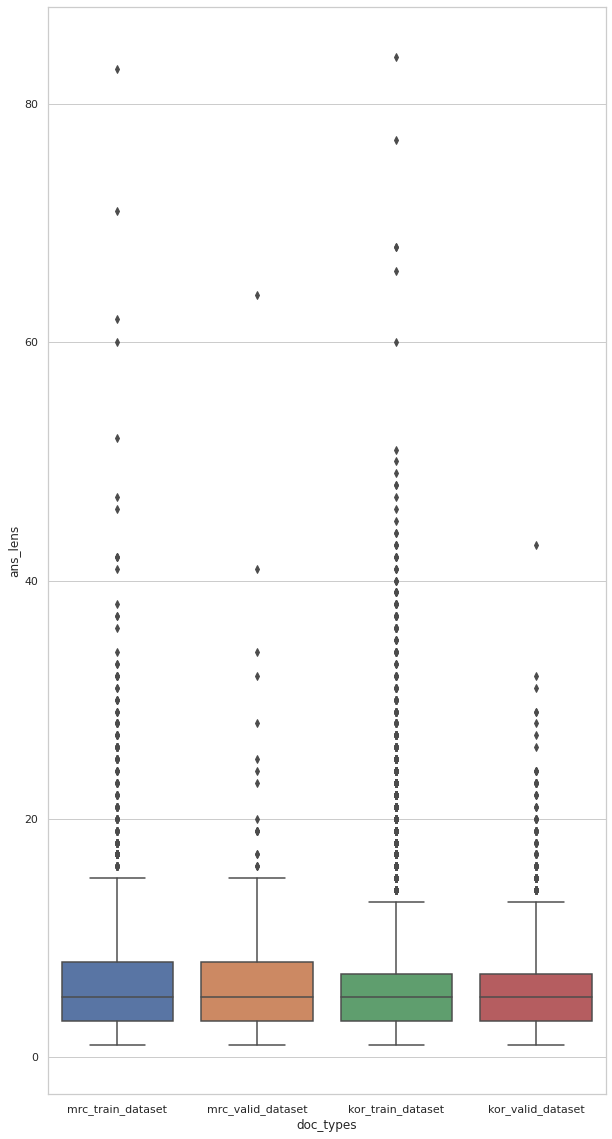

In [598]:
plt.figure(figsize=(10, 20))
sns.boxplot(x="doc_types", y="ans_lens", data=df)

In [54]:
df.doc_types.unique()

array(['mrc_train_dataset', 'mrc_valid_dataset', 'kor_train_dataset',
       'kor_valid_dataset'], dtype=object)

In [58]:
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='doc_types', ylabel='doc_lens'>

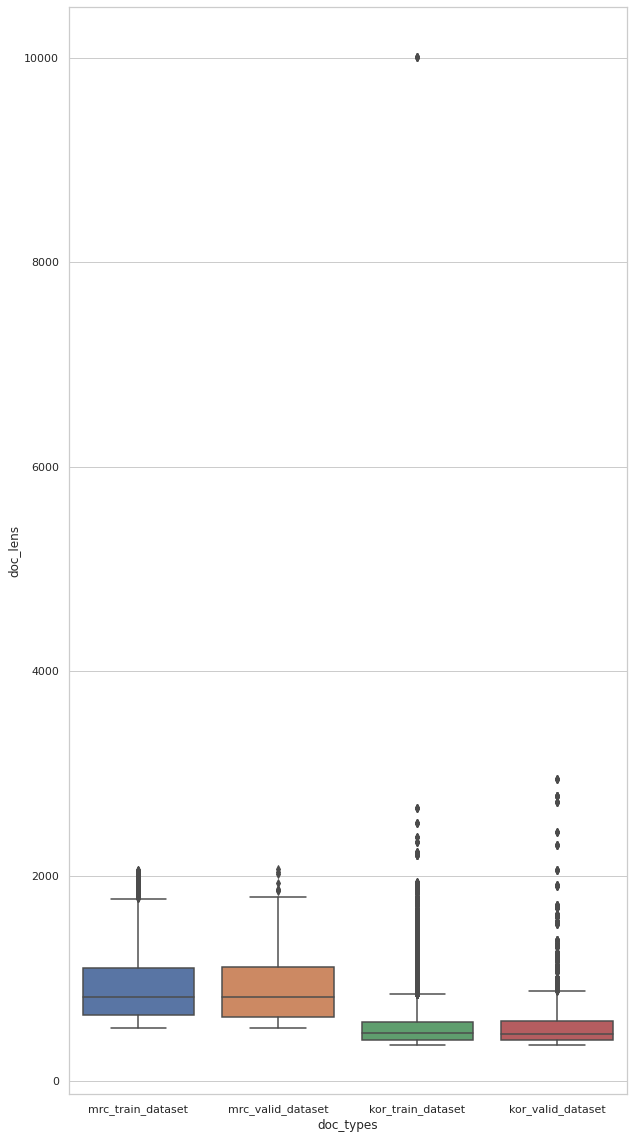

In [63]:
plt.figure(figsize=(10, 20))
sns.boxplot(x="doc_types", y="doc_lens", data=df)

<AxesSubplot:xlabel='doc_types', ylabel='ans_starts'>

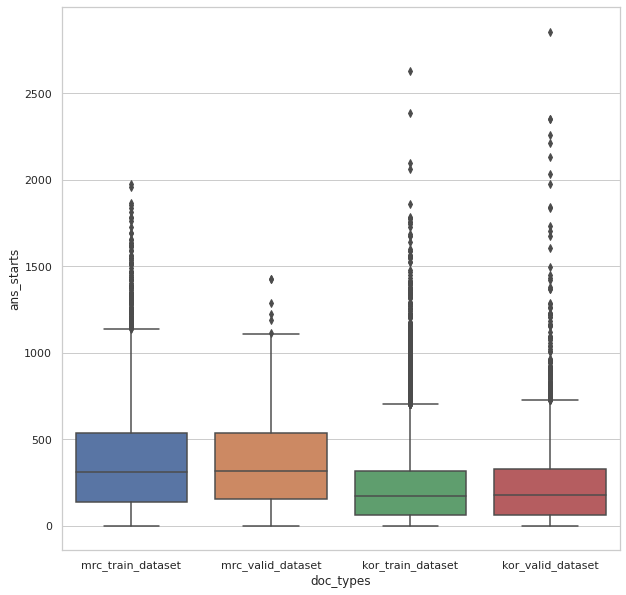

In [64]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="doc_types", y="ans_starts", data=df)

<AxesSubplot:xlabel='doc_types', ylabel='ans_ends'>

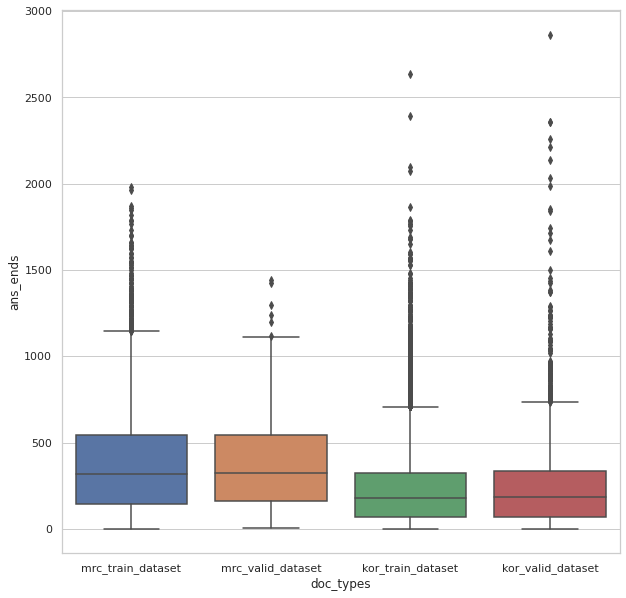

In [65]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="doc_types", y="ans_ends", data=df)

- KOR 데이터 셋에는 문서 길이가 엄청 긴 이상치가 하나 있다.
- 대체적으로 MRC 데이터셋이 KOR 데이터셋보다 문서가 길다. ( 문제가 더 어렵다 )

In [67]:
df.sample(3)

,doc_lens,ans_starts,ans_ends,doc_types
60514,425,49,55,kor_train_dataset
16263,715,445,449,kor_train_dataset
29393,407,199,204,kor_train_dataset


In [68]:
df.doc_lens.max()

10012

In [80]:
df["types"] = df["doc_types"].map(lambda x: "kor" if x.startswith("kor") else "mrc")

In [81]:
kor_df = df[df['types'] == 'kor']
mrc_df = df[df['types'] == 'mrc']

In [84]:
kor_sample_df = df[df['types'] == 'kor'].sample(len(mrc_df))

In [86]:
total_kor_mrc_sample_df = pd.concat([kor_sample_df, mrc_df], ignore_index=True)

<AxesSubplot:xlabel='ans_starts', ylabel='Count'>

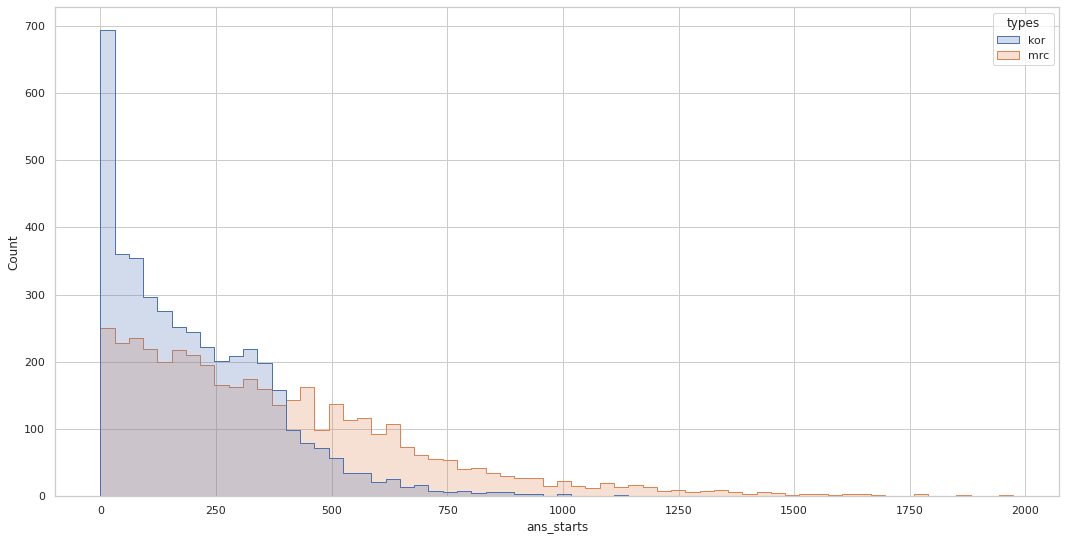

In [88]:
plt.figure(figsize=(18, 9))
sns.histplot(x="ans_starts", hue="types", element="step",data=total_kor_mrc_sample_df)

<AxesSubplot:xlabel='doc_lens', ylabel='Count'>

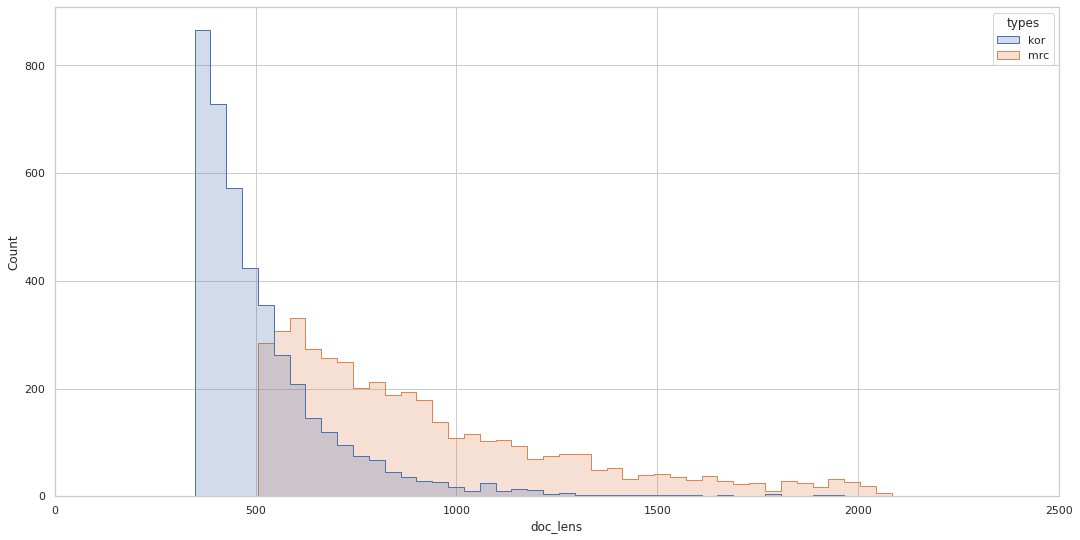

In [90]:
plt.figure(figsize=(18, 9))
plt.xlim([0, 2500])
sns.histplot(x="doc_lens", hue="types", element="step", data=total_kor_mrc_sample_df)

In [551]:
df.sample(5)

,doc_lens,ans_starts,ans_ends,doc_types,types
53582,605,517,522,kor_train_dataset,kor
2602,553,11,17,mrc_train_dataset,mrc
47140,367,271,273,kor_train_dataset,kor
44347,469,62,66,kor_train_dataset,kor
17405,625,82,87,kor_train_dataset,kor


In [553]:
len(mrc_df)

4192

In [571]:
# 500 이상의 길이로 샘플링, 
kor_500_sample = df[df.types == 'kor']
kor_500_sample = kor_500_sample[kor_500_sample.doc_lens > 500].sample(len(mrc_df))

In [572]:
len(kor_500_sample)

4192

In [573]:
total_kor_mrc_500_sample = pd.concat([kor_500_sample, mrc_df], ignore_index=True)

<AxesSubplot:xlabel='doc_lens', ylabel='Count'>

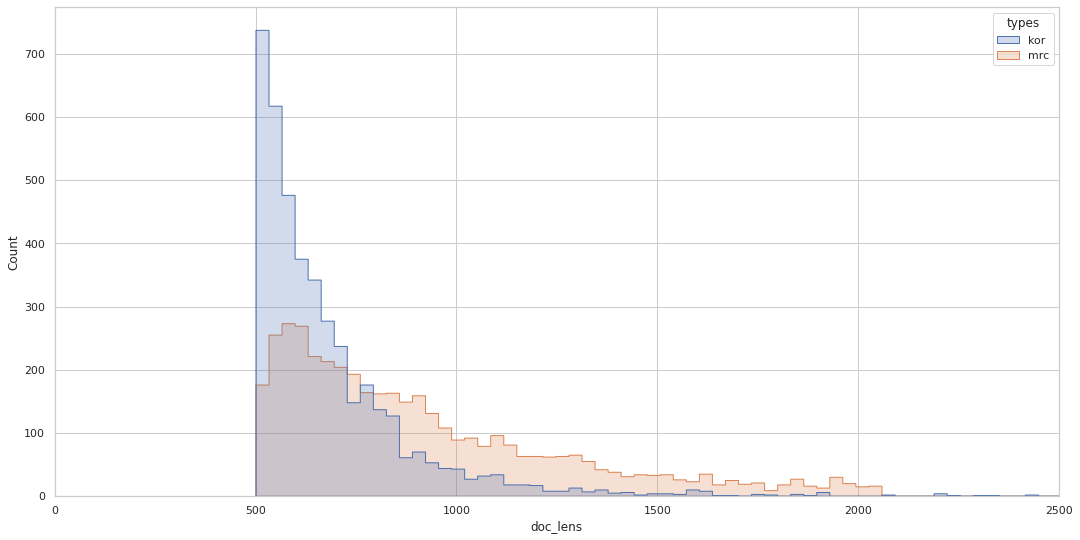

In [574]:
plt.figure(figsize=(18, 9))
plt.xlim([0, 2500])
sns.histplot(x="doc_lens", hue="types", element="step", data=total_kor_mrc_500_sample)

<AxesSubplot:xlabel='doc_types', ylabel='ans_starts'>

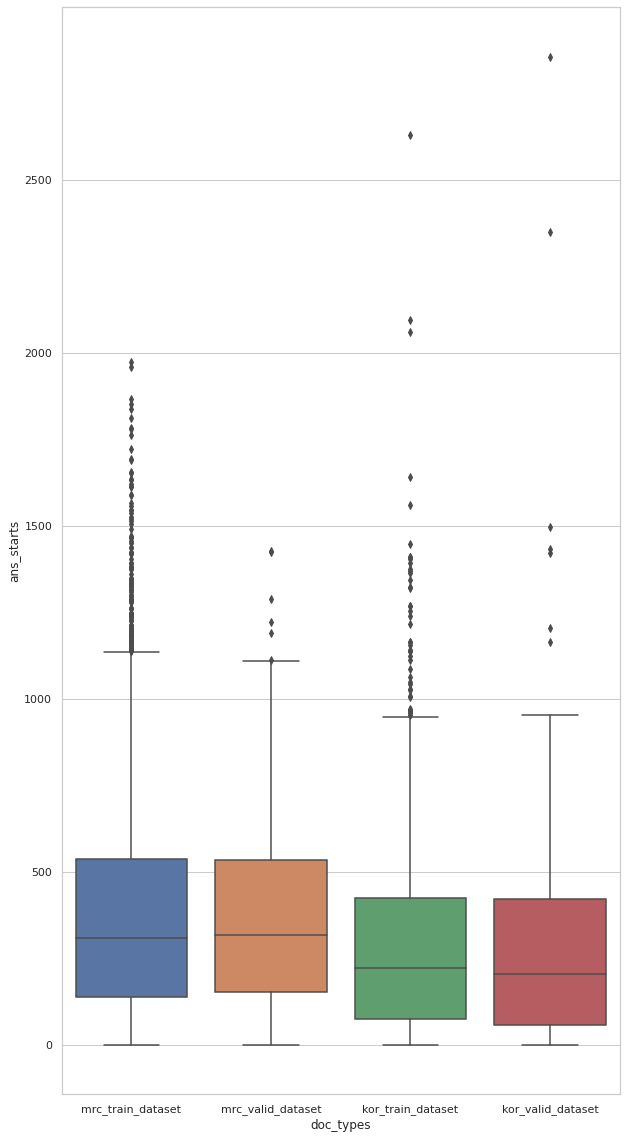

In [582]:
plt.figure(figsize=(10, 20))
sns.boxplot(x="doc_types", y="ans_starts", data=total_kor_mrc_500_sample, order=[
    'mrc_train_dataset', 'mrc_valid_dataset', 'kor_train_dataset', 'kor_valid_dataset'])

- ans_start가 KOR 같은 경우는 Imbalance 하다. ( 상대적으로 MRC 보다 더 )
- MRC 같은 경우는 문서의 길이가 최소 500 이상부터 시작한다.

#### validation에서 정답이 n개인 경우 Check

In [92]:
from collections import defaultdict

In [93]:
valid_answer_num = defaultdict(int)

for dataset in datasets:
    for data in dataset:
        answer_count = len(data['answers']['text'])
        valid_answer_num[answer_count] += 1

In [94]:
valid_answer_num

defaultdict(int, {1: 70373})

#### 문장들의 [CLS] Token Vector - TSNE 시각화

> Sparse는 TF-IDF를 쓰지...
> embedding 하는 방법에 따라 유독적으로 

( Model이 유의어에 얼마나 취약한지를 보기 위함 )

#### Docs [CLS] Token Vector - TNSE 시각화 

- Model: Kobert
( Document들이 어떤 식으로 군집되는지 시각화 )

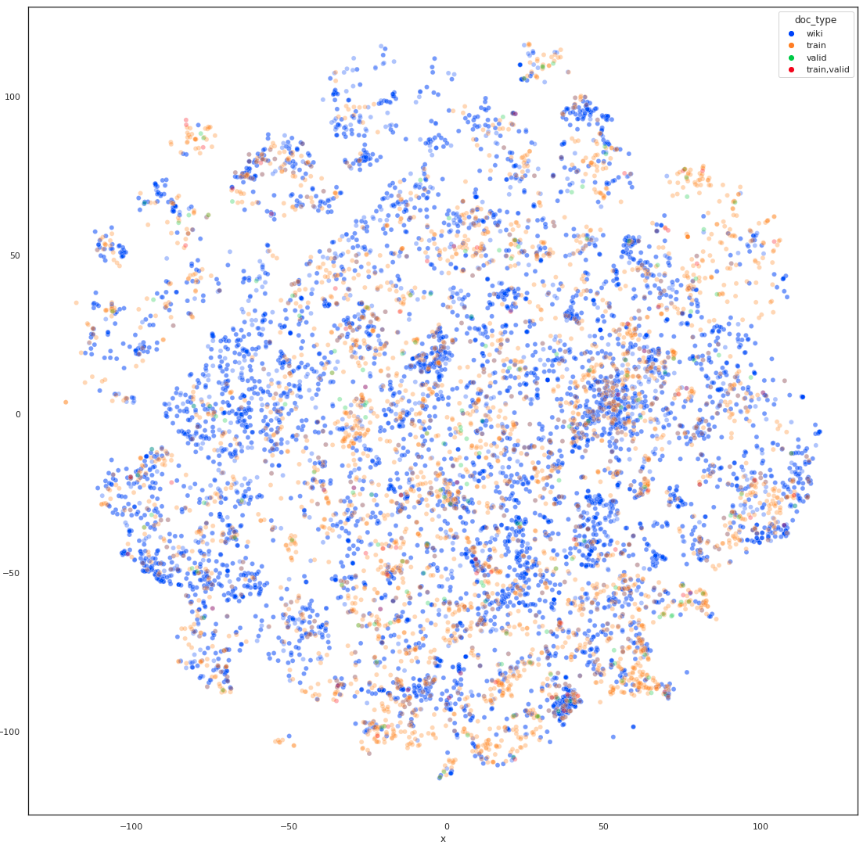

- topk 수정해야 되는 이유.jpg

#### Docs 문서, 한글 전처리 파이프라인 한 번 체크해보기

- document_id 기준으로 체크
- wiki, mrc, kor 따로따로 진행
- 각 함수 부분에서 얼마나 해당되는지 리스트 형태로 나타내기

In [95]:
!pip install -q soynlp kss

In [123]:
import os.path as p

import re
import glob
import random
from argparse import Namespace
from collections import OrderedDict

import kss
import torch
import numpy as np
from soynlp.normalizer import repeat_normalize
from konlpy.tag import Mecab


def remove_html(texts):
    """
    HTML 태그를 제거합니다.
    ``<p>안녕하세요 ㅎㅎ </p>`` -> ``안녕하세요 ㅎㅎ ``
    """
    preprcessed_text = []
    for text in texts:
        text = re.sub(r"<[^>]+>\s+(?=<)|<[^>]+>", "", text).strip()

        if not text:
            continue

        preprcessed_text.append(text)

    return preprcessed_text


def seperate_sentence(texts):
    """
    문장을 분리합니다.
    """
    sents = []
    for sent in texts:
        sent = sent.strip()

        if not sent:
            continue

        splited_sent = kss.split_sentences(sent)
        sents.extend(splited_sent)

    return sents


def remove_email(texts):
    """
    이메일을 제거합니다.
    ``홍길동 abc@gmail.com 연락주세요!`` -> ``홍길동  연락주세요!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_hashtag(texts):
    """
    해쉬태그(#)를 제거합니다.
    ``대박! #맛집 #JMT`` -> ``대박!  ``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"#\S+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_user_mention(texts):
    """
    유저에 대한 멘션(@) 태그를 제거합니다.
    ``@홍길동 감사합니다!`` -> `` 감사합니다!``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"@\w+", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_url(texts):
    """
    URL을 제거합니다.
    ``주소: www.naver.com`` -> ``주소: ``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"(http|https)?:\/\/\S+\b|www\.(\w+\.)+\S*", "", text).strip()
        text = re.sub(r"pic\.(\w+\.)+\S*", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_bad_char(texts):
    """
    문제를 일으킬 수 있는 문자들을 제거합니다.
    """
    bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
    preprcessed_text = []
    for text in texts:
        for bad_char in bad_chars:
            text = text.replace(bad_char, bad_chars[bad_char])
        text = re.sub(r"[\+á?\xc3\xa1]", "", text)
        if text:
            preprcessed_text.append(text)
    return preprcessed_text


def remove_press(texts):
    """
    언론 정보를 제거합니다.
    ``홍길동 기자 (연합뉴스)`` -> ````
    ``(이스탄불=연합뉴스) 하채림 특파원 -> ````
    """
    re_patterns = [
        r"\([^(]*?(뉴스|경제|일보|미디어|데일리|한겨례|타임즈|위키트리)\)",
        r"[가-힣]{0,4} (기자|선임기자|수습기자|특파원|객원기자|논설고문|통신원|연구소장) ",  # 이름 + 기자
        r"[가-힣]{1,}(뉴스|경제|일보|미디어|데일리|한겨례|타임|위키트리)",  # (... 연합뉴스) ..
        r"\(\s+\)",  # (  )
        r"\(=\s+\)",  # (=  )
        r"\(\s+=\)",  # (  =)
    ]

    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_copyright(texts):
    """
    뉴스 내 포함된 저작권 관련 텍스트를 제거합니다.
    ``(사진=저작권자(c) 연합뉴스, 무단 전재-재배포 금지)`` -> ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` TODO 수정할 것
    """
    re_patterns = [
        r"\<저작권자(\(c\)|ⓒ|©|\(Copyright\)|(\(c\))|(\(C\))).+?\>",
        r"저작권자\(c\)|ⓒ|©|(Copyright)|(\(c\))|(\(C\))",
    ]
    preprocessed_text = []
    for text in texts:
        for re_pattern in re_patterns:
            text = re.sub(re_pattern, "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_photo_info(texts):
    """
    뉴스 내 포함된 이미지에 대한 label을 제거합니다.
    ``(사진= 연합뉴스, 무단 전재-재배포 금지)`` -> ````
    ``(출처=청주시)`` -> ````
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\(출처 ?= ?.+\) |\(사진 ?= ?.+\) |\(자료 ?= ?.+\)| \(자료사진\) |사진=.+기자 ", "", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_useless_breacket(texts):
    """
    위키피디아 전처리를 위한 함수입니다.
    괄호 내부에 의미가 없는 정보를 제거합니다.
    아무런 정보를 포함하고 있지 않다면, 괄호를 통채로 제거합니다.
    ``수학(,)`` -> ``수학``
    ``수학(數學,) -> ``수학(數學)``
    """
    bracket_pattern = re.compile(r"\((.*?)\)")
    preprocessed_text = []
    for text in texts:
        modi_text = ""
        text = text.replace("()", "")  # 수학() -> 수학
        brackets = bracket_pattern.search(text)
        if not brackets:
            if text:
                preprocessed_text.append(text)
                continue
        replace_brackets = {}
        # key: 원본 문장에서 고쳐야하는 index, value: 고쳐져야 하는 값
        # e.g. {'2,8': '(數學)','34,37': ''}
        while brackets:
            index_key = str(brackets.start()) + "," + str(brackets.end())
            bracket = text[brackets.start() + 1 : brackets.end() - 1]
            infos = bracket.split(",")
            modi_infos = []
            for info in infos:
                info = info.strip()
                if len(info) > 0:
                    modi_infos.append(info)
            if len(modi_infos) > 0:
                replace_brackets[index_key] = "(" + ", ".join(modi_infos) + ")"
            else:
                replace_brackets[index_key] = ""
            brackets = bracket_pattern.search(text, brackets.start() + 1)
        end_index = 0
        for index_key in replace_brackets.keys():
            start_index = int(index_key.split(",")[0])
            modi_text += text[end_index:start_index]
            modi_text += replace_brackets[index_key]
            end_index = int(index_key.split(",")[1])
        modi_text += text[end_index:]
        modi_text = modi_text.strip()
        if modi_text:
            preprocessed_text.append(modi_text)
    return preprocessed_text


def remove_repeat_char(texts, num_repeats=3):
    """
    반복되는 말을 줄여줍니다.
    """
    preprocessed_text = []
    for text in texts:
        text = repeat_normalize(text, num_repeats=num_repeats).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def clean_punc(texts):
    """
    기호를 일반화합니다.
    """
    punct_mapping = {
        "‘": "'",
        "₹": "e",
        "´": "'",
        "°": "",
        "€": "e",
        "™": "tm",
        "√": " sqrt ",
        "×": "x",
        "²": "2",
        "—": "-",
        "–": "-",
        "’": "'",
        "_": "-",
        "`": "'",
        "“": '"',
        "”": '"',
        "“": '"',
        "£": "e",
        "∞": "infinity",
        "θ": "theta",
        "÷": "/",
        "α": "alpha",
        "•": ".",
        "à": "a",
        "−": "-",
        "β": "beta",
        "∅": "",
        "³": "3",
        "π": "pi",
    }

    preprocessed_text = []
    for text in texts:
        for pun in punct_mapping:
            text = text.replace(pun, punct_mapping[pun])
        text = text.strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_repeated_spacing(texts):
    """
    두 개 이상의 연속된 공백을 하나로 치환합니다.
    ``오늘은    날씨가   좋다.`` -> ``오늘은 날씨가 좋다.``
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\s+", " ", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text


def remove_dup_sent(texts):
    """
    중복된 문장을 제거합니다.
    """
    texts = list(OrderedDict.fromkeys(texts))
    return texts

In [147]:
def check_kor_preprocess(texts, corpus_idx, mut_dict):
    for func in funcs:
        post_texts = func(texts)
        if post_texts != texts:
            mut_dict[func.__name__].append(corpus_idx)
        texts = post_texts

In [126]:
from tqdm.notebook import tqdm

In [130]:
mrc_corpus = np.array(mrc_corpus)

In [151]:
sample_index = np.random.choice(len(mrc_corpus), 100)

In [152]:
for corpus_idx, texts in tqdm(zip(sample_index, mrc_corpus[sample_index])):
    print(corpus_idx)
    break
#     check_kor_preprocess(texts, corpus_idx)

3227


In [144]:
for k, v in all_checks.items():
    print(f"{k:10} : {len(v)}")

remove_html : 178
seperate_sentence : 129
remove_email : 127
remove_hashtag : 0
remove_user_mention : 0
remove_url : 0
remove_bad_char : 8
remove_press : 1
remove_copyright : 0
remove_photo_info : 0
remove_useless_breacket : 0
remove_repeat_char : 0
clean_punc : 6
remove_repeated_spacing : 0


In [159]:
all_checks = dict()

for corpus, name in zip([wiki_corpus, kor_corpus, mrc_corpus], ["wiki", "kor", "mrc"]):
    all_checks[name] = defaultdict(list)
    sample_index = np.random.choice(len(corpus), 100)
    corpus = np.array(corpus)
    
    for corpus_idx, texts in tqdm(zip(sample_index, corpus[sample_index])):
        check_kor_preprocess(texts, corpus_idx, all_checks[name])

In [161]:
for k, v in all_checks["wiki"].items():
    print(f"{k:10} : {len(v)}")

remove_html : 100
seperate_sentence : 81
remove_email : 81
clean_punc : 9
remove_bad_char : 4


In [165]:
wiki_corpus[all_checks["wiki"]['remove_html'][0]]

'염(念, 관, 정념, 4념처, 끊임없는 수동적 관찰,\n명기(明記)와 불망(不忘), 주의집중, 불산란,\n,\n,\n,\n,\n,\n,\n,\n)은 관습사(串習事) 즉 관습적인 일 즉 이미 만났던 적이 있는 일 또는 예전에 익힌 일에 대해 마음으로 하여금 잊지 않고 분명히 기억하게 하는 것[令心不忘明記]을 자성으로 하는 마음작용, 즉 마음과 상응하는 법이다.세친 조, 현장 한역|T.1612|loc=p. T31n1612_p0848c16 - T31n1612_p0848c17. 염(念)|ps"云何為念。謂於串習事令心不忘明記為性。"세친 지음, 현장 한역, 송성수 번역|K.618, T.1612|loc=p. 3 / 12. 염(念)|ps"어떤 것이 염(念)인가. 관습적인 일에 대해 마음이 잊지 않고 분명히 기억하게 하는 것을 자성으로 삼는 것이다."안혜 조, 지바하라 한역|T.1613|loc=p. T31n1613_p0851c26 - T31n1613_p0851c27. 염(念)|ps"云何念。謂於慣習事。心不忘失。明記為性。慣習事者。謂曾所習行。與不散亂所依為業。"\n\n《대승광오온론》의 해설에 따르면, 관습사(串習事)는 동음이철의 다른 한자어로 관습사(慣習事)라고도 하는데, \'이미 익힌 행[曾所習行]\' 즉 \'이미 경험한 또는 이미 되풀이 되고 있는 또는 이미 익숙한 행\'을 말한다.안혜 조, 지바하라 한역|T.1613|loc=p. T31n1613_p0851c26 - T31n1613_p0851c27. 염(念)|ps"云何念。謂於慣習事。心不忘失。明記為性。慣習事者。謂曾所習行。與不散亂所依為業。"\n\n염(念, 끊임없는 수동적 관찰, 주의집중)의 본질적 작용[業]은 불산란(不散亂) 즉 삼마지(三摩地: 선정과 삼매)의 마음작용의 소의(所依) 즉 의지처 또는 발동근거가 되는 것이다.안혜 조, 지바하라 한역|T.1613|loc=p. T31n1613_p0851c26 - T31n1613_p0851c27. 염(念)|ps"云何念。謂於慣習事。心不忘失。明記為性。慣習事者。謂曾所習行。與不散亂所依為業。" 즉 염

In [176]:
wiki_corpus[all_checks["wiki"]['remove_email'][50]]

'카스피해 주변 국가 간에 10년에 이르는 영해 확정협의가 계속되고 있다. 카스피해를 바다로 할 것인지 호수로 할 것인지, 특히 3가지가 문제가 된다. 즉 광물 자원(석유. 천연가스), 어업, 그리고 국제 수역으로서 입지. 특히 흑해나 발트해에 달하는 볼가강으로의 연결은 내륙국인 아제르바이잔, 투르크메니스탄, 카자흐스탄에게 있어 중요하다. 카스피해는 바다로서는 국외선의 통과를 허락하는 국제 조약이 유효하게 되었지만, 호수가 되면 의무가 없어진다. 이것에는 환경 문제도 관계한다. 또, 카스피해에서는 구 소련의 함정을 이어받은 러시아 해군의 위용이 막강하다.\n\n2018년 8월 바다와 호수 중간의 특수 지위로 하는 협상이 타결되었다.'

In [179]:
wiki_corpus[all_checks["wiki"]['clean_punc'][5]]

'2002년 사스 당시, 실험실 연구에서 칼레트라가 효과가 있다는 연구 결과를 얻었다.\n\n2020년 중국에서 신종 코로나바이러스 치료 효과를 기대하는 30여 약물 중 12개가 HIV치료제다.\n\n칼레트라의 항바이러스제 성분이 신종 코로나바이러스(2019-nCoV)도 같은 기전으로 치료 효과를 낼 수 있을 것으로 기대된다.\n\n태국에서는 칼레트라를 투약한 71세 여성 환자가 완치 판정을 받았다.\n\n2020년 1월 24일, 중국 우한에서 일하다 귀국한 2번 환자(한국인 남성·55)가 신종 코로나 확진 판정을 받아 서울 중구 국립중앙의료원에 격리됐다. 입원 3일째 부터 경구 칼레트라정을 처방했는데, 7일째에 기침이 사라졌다. 2월 4일 코로나바이러스가 검출되지 않아서 퇴원했다. 한국에서 최초의 완치하여 퇴원한 사례이다.\n\n2번 확진자를 치료한 국립중앙의료원 진범식 감염내과 전문의는 3가지 후보약물 중에서 부작용이 가장 적은 칼레트라를 선택했다고 밝혔다. 경증 환자에게는 칼레트라를 처방하고, 환자가 임상적으로 중증에 해당될 경우에는 리바비린이나 인터페론을 신중하게 고려해 사용하고 있다고 한다.\n\n폐렴 증상이 심한 1번과 4번 환자에게 칼레트라를 투약하고 있다. 한때 위독하다는 설이 돌기도 했던 4번 환자도 관련 증상이 사라져 퇴원이 검토되고 있다.\n\n2월 6일, 1번 환자가 퇴원했다. 인천시의료원은 경구 칼레트라정을 처방했다. 1번 확진자를 치료한 김진용 인천의료원 감염내과 과장은 "`칼레트라`라는 약인데,나온 지가 거의 20년 된 안전한 약입니다. 부작용 없고. 효과가 있었다 없았다를 말씀드리기는 어렵습니다."라고 말했다.\n\n2월 7일, 전남대병원은 국내 16번째이자 광주 첫 확진자인 43세 한국인 여성 A씨에게 HIV(인간면역결핍바이러스) 치료제 ‘칼레트라’를 사용 중이다.\n\n전염병 권위자인 홍콩대 윈궉융 교수는 2019-nCoV 및 MERS-CoV에서 렘데시비르가 가장 유망한 약물이라는데 동의하지만, 약제를 쉽게 구할 수 없다는 점에

In [185]:
# bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
wiki_corpus[all_checks["wiki"]['remove_bad_char'][1]]

'《Milk and Honey》의 재킷 앞면과 뒷면은 《Double Fantasy》에서 일본인 사진 작가 시노야마 기신이 촬영한 세션의 또 다른 샷이 사용되고 있다. 하지만, 컬러로 표시되고 있는 점이 다르다.   이너 게이트폴드에는 브라우닝 부부의 시("Rabbi ben Ezra!", "How do I love thee?"), 그리고 레논 부부의 가사("Grow Old with Me", "Let Me Count the Ways")가 실려져 있고, 이와 함께 미국의 사진 작가 알란 타넨바움이 촬영한 레논 부부의 사진이 함께 실려져 있다 가사를 포함하고 있는 이너 슬리브에는 오노의 서문이 씌여져 있으며, 자신과 레논이 로버트 브라우닝과 엘리자베스 바렛 브라우닝의 환생이라고 주장하는 내용도 있다'

In [162]:
for k, v in all_checks["kor"].items():
    print(f"{k:10} : {len(v)}")

remove_html : 100
seperate_sentence : 71
remove_email : 68
remove_bad_char : 4
remove_press : 1
clean_punc : 1


In [188]:
kor_corpus[all_checks["kor"]['remove_bad_char'][0]]

'선거 기간에는 정책 쇼핑몰 \'문재인 1번가\'라는 웹사이트를 운영했었다. 문재인 후보의 공약을 쉽고 친근하게 전달하기 위해 만든 공약 플랫폼으로 큰 화제를 모아 100만 개가 넘는 공약이 판매되는 인기를 끌었다. 베스트 상품 1위로는 \'안전이 정착된 나라\', 2위에는 \'최순실 없는 나라\', 3위는 \'우리 아이 평등세상\'이 각각 올랐다. 문재인 정부가 정식으로 출범한 뒤인 5월 25일에는 인수위원회 역할을 하던 국정기획자문위원회가 산하에 국민참여기구로 국민인수위원회를 구성하고 새 정부 국정운영 계획에 국민 의견을 수렴하기 위한 기구로 광화문 1번가를 개소했다. 광화문 세종로 공원에 마련하였는데 시민들이 정책을 제안하면 이를 접수해 정책 결정 과정에 반영하는 역할을 하게 된다. 인터넷 웹사이트로도 개설했으며, 29일에는 지방 곳곳에도 설치를 하였다. 이후 출범한 지 50일이 되는 7월 12일에 해단식을 하면서 활동을 종료했는데 가장 많이 제안된 의견은 \'민생·복지·교육\'이었고 그 다음을 일자리와 부정부패 청산이 이었다. 또한 주요 키워드는 일자리, 고용, 청년, 여성, 기업, 학교, 교사, 경찰·안전, 비정규직 등이었다. 8월 20일에는 국민인수위원회의 정책 제안에 저부가 답변을 하고 국정 운영방향을 하는 대국민보고대회가 청와대에서 진행되었다. 일자리 창출, 장애인 배려, 자살 예방은 물론 힙합 래퍼가 직접 음원 수익 관련 건의를 하는 등 현실적인 질문들도 잇따랐다. 이에 대해 더불어민주당은 "지난 3개월 동안의 국정운영 성과를 국민에게 알리는 동시에 국민의 의견을 청취해 형식과 내용, 모든 면에서 진정한 소통 장면이었다"고 극찬했으며, 자유한국당은 "대통령의 \'쇼통\'은 참으로 부끄러운 이야기"라며 "소통이 아닌 쇼통을 하는 것은 한계가 있다고 본다"고 혹평했다. 19일에는 \'국민소통플랫폼\'으로 국민들의 청원을 듣자는 취지로 청와대 홈페이지에 청와대 국민청원 코너를 만들었다. 2018년 1월 10일에는 신년 기자회견을 하면서 기존의 방식과

In [192]:
kor_corpus[all_checks["kor"]['remove_press'][0]]

'선거 기간에는 정책 쇼핑몰 \'문재인 1번가\'라는 웹사이트를 운영했었다. 문재인 후보의 공약을 쉽고 친근하게 전달하기 위해 만든 공약 플랫폼으로 큰 화제를 모아 100만 개가 넘는 공약이 판매되는 인기를 끌었다. 베스트 상품 1위로는 \'안전이 정착된 나라\', 2위에는 \'최순실 없는 나라\', 3위는 \'우리 아이 평등세상\'이 각각 올랐다. 문재인 정부가 정식으로 출범한 뒤인 5월 25일에는 인수위원회 역할을 하던 국정기획자문위원회가 산하에 국민참여기구로 국민인수위원회를 구성하고 새 정부 국정운영 계획에 국민 의견을 수렴하기 위한 기구로 광화문 1번가를 개소했다. 광화문 세종로 공원에 마련하였는데 시민들이 정책을 제안하면 이를 접수해 정책 결정 과정에 반영하는 역할을 하게 된다. 인터넷 웹사이트로도 개설했으며, 29일에는 지방 곳곳에도 설치를 하였다. 이후 출범한 지 50일이 되는 7월 12일에 해단식을 하면서 활동을 종료했는데 가장 많이 제안된 의견은 \'민생·복지·교육\'이었고 그 다음을 일자리와 부정부패 청산이 이었다. 또한 주요 키워드는 일자리, 고용, 청년, 여성, 기업, 학교, 교사, 경찰·안전, 비정규직 등이었다. 8월 20일에는 국민인수위원회의 정책 제안에 저부가 답변을 하고 국정 운영방향을 하는 대국민보고대회가 청와대에서 진행되었다. 일자리 창출, 장애인 배려, 자살 예방은 물론 힙합 래퍼가 직접 음원 수익 관련 건의를 하는 등 현실적인 질문들도 잇따랐다. 이에 대해 더불어민주당은 "지난 3개월 동안의 국정운영 성과를 국민에게 알리는 동시에 국민의 의견을 청취해 형식과 내용, 모든 면에서 진정한 소통 장면이었다"고 극찬했으며, 자유한국당은 "대통령의 \'쇼통\'은 참으로 부끄러운 이야기"라며 "소통이 아닌 쇼통을 하는 것은 한계가 있다고 본다"고 혹평했다. 19일에는 \'국민소통플랫폼\'으로 국민들의 청원을 듣자는 취지로 청와대 홈페이지에 청와대 국민청원 코너를 만들었다. 2018년 1월 10일에는 신년 기자회견을 하면서 기존의 방식과

In [193]:
kor_corpus[all_checks["kor"]['clean_punc'][0]]

'윤달 2월 26일, 서울에 때늦은 눈과 우박이 내렸다. 윤달 2월 28일, 경상도에 크기가 새알만한 우박이 내렸음이 3월 8일에 보고되었다. 3월 25일, 평안도에 서리가 내렸음이 4월 7일에 보고되었다. 평안도는 이어 3월 27일, 4월 6일, 4월 7일에 연이어 서리 우박이 내려 곡식의 싹이 죽고 목화•삼베가 모두 피해를 입었으며, 심지어는 3월에 눈까지 내리는 기현상을 보인다. 4월 6일에는 경기도에 우박이 내려 밀과 보리가 피해를 입었다. 전라도와 경상도는 4월 8일에 서리가, 4월 9일에 우박이 내렸으며, 동시에 매우 가물었다. 4월 16일에 함경도에 우박이 내렸는데, 5월 5일에 보고되었다. 4월 23일에는 전라도에서 밤마다 서리가 내려 농작물이 피해를 입는다는 보고가 올라왔다. 4월 28일에는 원양도(현대의 강원도)에 우박이 내렸다. 5월 7일, 평안 감사의 보고가 도착했다. 평안도에 연일 우박이 내려 땅에 반 자(약 15 cm)나 쌓였으며, 동시에 가뭄이 너무 심각하여 농사가 가망이 없다는 내용이었다. 5월 9일에는 경기도에 우박이 내려 5월 12일에 보고되었다. 5월 16일에는 원양도와 황해도에 우박이 내렸음이 보고되었다. 5월 17일에 평안 감사의 보고를 올렸는데, 그 내용이 기가 막혔다. 우박으로 인해 벼가 상한 것은 물론, 오리알 만한 크기의 우박이 쏟아져 반 자나 쌓이고, 네 살짜리 아이가 그 우박에 맞아 죽었으며, 꿩•토끼•까마귀•까치 등 짐승들이 숱하게 죽었다. 5월 22일에는 지난 5월 5일에 평안도에서 우박이 내렸음이 보고되었다. 가뭄이 물러가고 홍수가 시작된 6월에는 다시 평안도에서 우레와 바람을 동반한 우박이 내렸다. 6월 16일에 또다시 평안도에 우박이 내려 곡식이 상했는데, 7월 11일에 보고되었다. 7월 11일에는 또 지난 6월 5일에 함경도에 비둘기 알 만한 우박이 내렸음이 보고되었다.'

In [194]:
for k, v in all_checks["mrc"].items():
    print(f"{k:10} : {len(v)}")

remove_html : 100
seperate_sentence : 74
remove_email : 73
remove_bad_char : 5
remove_press : 1
clean_punc : 6


In [197]:
mrc_corpus[all_checks["mrc"]['remove_bad_char'][3]]

'어린 시절 음반 콜렉터였던 삼촌을 통해 음악을 많이 듣게 되었다. 고등학교 때 취미 정도로 재미삼아 미디프로그램을 만지고 놀기 시작했지만, 서울대 공업디자인과 진학 이후에 곡을 완성할 수 있는 정도가 되었다. 그 즈음 음악 듣는 취향도 나름 다양해졌고, 좋은 곡을 써보고 싶다는 욕심도 생기기 시작했다. 죽어라 알바를 시작해 장비를 사들이기 시작, 기쁜 마음으로 장비를 사들였지만 2주만에 군대를 갔다. 그런 상황이다 보니 군복무하면서 음악에 대한 욕망이 더 커졌다. 군 복무 시절 대학동기인 김기조(붕가붕가레코드 수석 디자이너)에게 붕가붕가레코드의 소식을 전해듣고는 군 제대 후 붕가붕가레코드에 합류하겠다는 의중을 전하기도 했다. 사실 그때도 음악인이 되겠다는 심각한 결심을 한 건 아니었다. 전공이 디자인이어서 나름 자동차 디자인을 업으로 삼으려 준비하고 있었다. 그러다 장기하와 얼굴들의 《싸구려 커피》가 성공을 하면서 나름 목돈을 쥐게 됐다. 그 때 전공이고 뭐고 음악을 함 제대로 해보자 그런 생각을 갖게 됐다\\n\\n2005년에 데뷔한 술탄 오브 더 디스코의 리더를 맡았다. 그는 이를 "의도하지 않고 저절히 생긴 일종의 이벤트 같은 거"라고 표혔했다. 제대 후 붕가붕가레코드에 결합하면서 윤덕원(브로콜리 너마저), 곰사장, 김기조 등과 자주 만났는데 당시 눈뜨고 코베인 합주실 겸 사무실에서 모여 수공업 CD 라벨 붙이고 있는데, 윤덕원이 자기가 만들어 놓은 리프를 하나 들려줬고 "어! 재밌는데. 함 해볼까?" 이러다가 시작되었다. 군 복무 시절에도 휴가 나와 붕가붕가레코드 회식자리에서 "뭔가 말도 안되는 걸 해보자. 가운데 멤버 하나는 누워있고, 뚱뚱한 멤버 하나가 하인들 데리고 나와 막 춤추고 하는 그런 밴드." 그냥 그 정도 컨셉만 얘기하고 말았는데 윤덕원이 술탄 오브 더 디스코라는 이름을 말했고, 그가 본격적으로 결합하게 되면서 술탄이 탄생하게 됐다. 나잠 수 입장에선 곡을 쓰기 위한 일종의 습작의 기회이기도 했으며, 다른 사람들도 이런저런 실험을 해보는

In [198]:
mrc_corpus[all_checks["mrc"]['remove_press'][0]]

'조지 플로이드 사망 사건\\n2020년 5월 25일 오후 8시 8분 미니애폴리스 경찰국 경찰관들은 위조지폐 사용이 의심된다는 911 전화를 받고 출동했다. 경찰에 따르면 46세 아프리카계 미국인 남성 조지 플로이드는 근처 자동차 안에 있었고, 경찰관들이 플로이드에게 자동차 밖으로 나오라고 명령했을 때 그가 물리적으로 저항했다고 주장했다. 근처 식당의 감시 카메라에는 플로이드가 경찰관을 처음 마주한 순간부터 제압당할 때까지 물리적 저항을 하지 않은 모습이 찍혔다. \\n\\n행인이 페이스북 라이브 생방송 스트리밍으로 녹화한 영상에는 48세 백인계 미국인 경찰관 데릭 쇼빈이 플로이드를 바닥에 엎드리게 하고 무릎으로 목을 누르는 모습이 찍혔다. 플로이드는 쇼빈에게 계속 "제발요.", "숨을 쉴 수 없어요."라고 말했다. 시간이 흐르고 행인은 플로이드가 코에서 피를 흘리고 있다고 말했고 다른 행인은 플로이드가 지금 당장 저항하고 있지도 않고 있다고 경찰관에게 말했지만 경찰관은 행인들에게 플로이드가 말을 하고 있으니 괜찮다고 말했다. 행인은 괜찮지 않다고 대답했다. 그 뒤 행인은 경찰관이 플로이드가 숨을 쉬지 못하게 하고 있다고 항의하며 경찰관들에게 "그를 일으켜라. … 당신은 그를 지금 자동차 안으로 들여보낼 수 있지 않느냐. 지금 그는 체포에 저항하고 있지도 않다."고 말했다 그 뒤 플로이드는 말과 행동이 없어졌다. 구급차가 도착했지만 쇼빈은 구급대가 플로이드를 들것으로 옮기기 전까지 무릎을 치우지 않았다. 쇼빈뿐만 아니라 다른 경찰관들도 플로이드를 무릎으로 제압한 사실이 다른 동영상을 통해 밝혀졌다. \\n\\n의료진들은 플로이드가 맥박이 없다는 것을 확인했고, 플로이드는 병원에서 사망이 선고됐다. 5월 26일에 시신의 검시가 이루어졌고, 다음날 헤너핀군 검시관실의 예비 보고서가 나왔는데 외상 질식이나 목졸림을 진단할 만한 신체적인 소견은 없다고 적혔다. 플로이드는 기저 질환으로 관상동맥질환과 고혈압성 심장병을 가지고 있었고, 최초 보고서 따르면 경찰의 제압과 

In [200]:
mrc_corpus[all_checks["mrc"]['clean_punc'][1]]

'브레노 마을의 역사는 갈리아 시대로 거슬러 올라간다. 이후 낭튀아 수도원의 소수도원이 지어졌다 당시 메리아의 주교들이 이 마을에 도착했다는 기록이 남아 있다. .\\n\\n1116년에는 퐁스 드 발메가 샤르트뢰에 브레노 일대 지역을 넘겨 메리아 수도원을 이전하도록 했다. 하지만 이 당시 지역 면적은 지금으로 치면 6km²에 불과한 좁은 지역이었기에 1144년 리옹 대주교가 페리에르 토지를 합했다. 이 영토는 처음에는 브레놀랑이 소유했다가 수차례의 소송을 겪고, 13세기에 들어서 윙베르 드 투아르비야르가 해당 지역을 지키게 되었다. 1424년에는 사보이 왕국의 영토가 되었다.\\n\\n17세기에는 마을 사람들이 폭동을 일으켜 주교들을 뒤쫓고 메리아 샤르트르회 수도원을 파괴해, 그 돌을 근처의 수도원 농장과 집을 짓는 데 썼다는 기록이 남아있다. 한편 브레노의 임림 지대가 국가에 귀속되었으나 슈비야르 주민들과의 협약으로 40%의 영토를 돌려받게 되었다.\\n\\n19세기 초에는 프랑스의 다른 지방과 마찬가지로 주민들이 살던 집을 내버리고 마을을 떠나는 현상을 겪었다. 하지만 그 이름과 지위는 유지할 수 있었다. 이후로는 부르캉브레스와 리옹에 시립병원이 들어서 고아들을 받게 되면서 마을 주민수도 다시 회복되었다.\\n\\n두 차례의 세계대전이 발생할 당시 브레노 마을에는 아무런 영향이 가지 않았다. 전후에는 별장이 많이 조성되었다.'

In [96]:
import json

with open('/opt/ml/input/data/wikipedia_documents.json', "r") as f:
    wiki = json.load(f)

In [98]:
wiki_corpus = [v['text'] for v in wiki.values()]

In [104]:
mrc_corpus = mrc_datasets['train']['context'] + mrc_datasets['validation']['context']

In [105]:
kor_corpus = kor_datasets['train']['context'] + kor_datasets['validation']['context']

In [106]:
len(wiki_corpus), len(mrc_corpus), len(kor_corpus)

(60613, 4192, 66181)

#### Mecab 활용해서 Answer가 객체인 경우 체크해보기, 정답이 객체인 경우 지칭 문제 고려

- MRC 데이터셋에서만 체크

In [207]:
model_name = "monologg/koelectra-base-v3-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [210]:
sample_text = "안녕하세요! 좋은 아침입니다!! 하하하"
tokenizer.decode(tokenizer.encode(sample_text))

'[CLS] 안녕하세요! 좋은 아침입니다!! 하하하 [SEP]'

In [209]:
from konlpy.tag import Mecab
mecab = Mecab()

/usr/local/lib/mecab/dic/mecab-ko-dic
/opt/conda/lib/python3.7/site-packages/konlpy


In [211]:
mecab.pos(sample_text)

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EP+EF'),
 ('!', 'SF'),
 ('좋', 'VA'),
 ('은', 'ETM'),
 ('아침', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('!', 'SF'),
 ('!', 'SY'),
 ('하하하', 'MAG')]

In [213]:
from datasets import concatenate_datasets

full_ds = concatenate_datasets([
            mrc_datasets["train"].flatten_indices(),
            mrc_datasets["validation"].flatten_indices(),
        ])

In [214]:
full_ds

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 4192
})

In [402]:
tokenized_examples = tokenizer(
    full_ds['question'],
    full_ds['context'],
    truncation="only_second",
    max_length=386,
    stride=32,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
    padding="max_length"
)

In [403]:
tokenized_examples[0]

Encoding(num_tokens=386, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [404]:
sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
offset_mapping = tokenized_examples.pop("offset_mapping")

tokenized_examples["start_positions"] = []
tokenized_examples["end_positions"] = []
tokenized_examples["token_offset_start"] = []
tokenized_examples["token_offset_end"] = []

for i, offsets in enumerate(tqdm(offset_mapping)):
    input_ids = tokenized_examples["input_ids"][i]
    cls_index = input_ids.index(tokenizer.cls_token_id)

    sequence_ids = tokenized_examples.sequence_ids(i)

    sample_index = sample_mapping[i]
    answers = full_ds['answers'][sample_index]

    if len(answers["answer_start"]) == 0:
        tokenized_examples["start_positions"].append(cls_index)
        tokenized_examples["end_positions"].append(cls_index)
    else:
        start_char = answers["answer_start"][0]
        end_char = start_char + len(answers["text"][0])

        token_start_index = 0
        while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
            token_start_index += 1

        token_end_index = len(input_ids) - 1
        while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
            token_end_index -= 1

        if not (offsets[token_start_index][0] <= start_char and offsets[token_end_index][1] >= end_char):
            tokenized_examples["start_positions"].append(cls_index)
            tokenized_examples["end_positions"].append(cls_index)
            tokenized_examples["token_offset_start"].append(cls_index)
            tokenized_examples["token_offset_end"].append(cls_index)
        else:
            while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
                token_start_index += 1
            tokenized_examples["start_positions"].append(token_start_index - 1)
            tokenized_examples["token_offset_start"].append(offsets[token_start_index - 1][0])
        
            while offsets[token_end_index][1] >= end_char:
                token_end_index -= 1        
            tokenized_examples["end_positions"].append(token_end_index + 1)
            tokenized_examples["token_offset_end"].append(offsets[token_end_index + 1][1])

In [406]:
em_tokens = {
    'ground_truth': [],
    'predict_answer': []
}

for idx, (check, start_pos, end_pos)  in enumerate(zip(tokenized_examples.start_positions, tokenized_examples.token_offset_start, tokenized_examples.token_offset_end)):
    if check == 0: # 정답이 없는 경우
        continue
    
    sample_idx = sample_mapping[idx]
    answers = full_ds['answers'][sample_idx]
    
    start_char = answers["answer_start"][0]
    end_char = start_char + len(answers["text"][0])
    
    real = full_ds['context'][sample_idx][start_char:end_char]
    pred = full_ds['context'][sample_idx][start_pos:end_pos]
    
    em_tokens['ground_truth'].append(real)
    em_tokens['predict_answer'].append(pred)

In [407]:
em_dataframe = pd.DataFrame(em_tokens)

In [408]:
em_dataframe.sample(3)

,ground_truth,predict_answer
944,개괄주의,개괄주의
1407,크로노스,크로노스
1467,물,물


In [409]:
em_dataframe[em_dataframe.ground_truth != em_dataframe.predict_answer]

,ground_truth,predict_answer
9,큰아들 유,큰아들 유가
40,지상요원들,지상요원들이
120,몰타,몰타로
201,미쓰히데 군,미쓰히데 군의
359,일본,일본인
...,...,...
4190,퀘이커 교,퀘이커 교도
4193,독일,독일군
4194,제 3자,제 3자의
4196,가리타 히사노리,가리타 히사노리에


In [427]:
from konlpy.tag import Hannanum, Kkma

In [428]:
hannanum = Hannanum()
kkma = Kkma()

## 어떻게든 처리 못하는 경우

In [415]:
mecab.pos(em_dataframe.predict_answer[9])

[('큰', 'VA+ETM'), ('아들', 'NNG'), ('유가', 'NNG')]

In [414]:
mecab.pos(em_dataframe.predict_answer[9] + "말했다")

[('큰', 'VA+ETM'),
 ('아들', 'NNG'),
 ('유가', 'NNG'),
 ('말', 'NNG'),
 ('했', 'XSV+EP'),
 ('다', 'EC')]

In [413]:
mecab.pos("유가")

[('유가', 'NNG')]

In [436]:
hannanum.pos(em_dataframe.predict_answer[9])

[('큰아들', 'N'), ('유가', 'N')]

In [438]:
hannanum.pos(em_dataframe.predict_answer[9] + "말했다")

[('큰아들', 'N'), ('유가말', 'N'), ('하', 'X'), ('었다', 'E')]

In [439]:
hannanum.pos("유가")

[('유가', 'N')]

In [440]:
kkma.pos(em_dataframe.predict_answer[9])

[('큰아들', 'NNG'), ('유가', 'NNG')]

In [441]:
kkma.pos(em_dataframe.predict_answer[9] + "말했다")

[('큰아들', 'NNG'), ('유가', 'NNG'), ('말하', 'VV'), ('었', 'EPT'), ('다', 'EFN')]

In [442]:
kkma.pos("유가")

[('유가', 'NNG')]

In [443]:
mecab.pos("큰아들유가")

[('큰', 'VA+ETM'), ('아들', 'NNG'), ('유가', 'NNG')]

In [444]:
hannanum.pos("큰아들유가")

[('큰아들유가', 'N')]

In [445]:
kkma.pos("큰아들유가")

[('큰아들', 'NNG'), ('유가', 'NNG')]

## 처리 가능한 경우

In [416]:
mecab.pos(em_dataframe.predict_answer[40])

[('지상', 'NNG'), ('요원', 'NNG'), ('들', 'XSN'), ('이', 'JKS')]

In [420]:
mecab.pos(em_dataframe.predict_answer[201])

[('미쓰히데', 'NNP'), ('군의', 'NNG')]

In [448]:
error_dataset = em_dataframe[em_dataframe.ground_truth != em_dataframe.predict_answer]

In [454]:
error_dataset.head(5)

,ground_truth,predict_answer
9,큰아들 유,큰아들 유가
40,지상요원들,지상요원들이
120,몰타,몰타로
201,미쓰히데 군,미쓰히데 군의
359,일본,일본인


In [470]:
b = [3]

In [471]:
b[:-1]

[]

In [584]:
len(em_dataframe), len(error_dataset)

(4360, 107)

In [487]:
pos_correct_set = set()
pos_false_set = set()

pos_false_list = []
pos_correct_list = []

for real, pred in zip(error_dataset.ground_truth, error_dataset.predict_answer):
    pred_pos = mecab.pos(pred)
    
    if len(pred_pos) == 1:
        continue
    
    new_pred = " ".join(list(zip(*pred_pos[:-1]))[0])
    
    if real == new_pred:
        pos_correct_set.add(pred_pos[-1][1])
        pos_correct_list.append(pred_pos)
    else:
        pos_false_set.add(pred_pos[-1][1])
        pos_false_list.append(pred_pos)

In [488]:
pos_correct_set

{'JKB', 'JKS', 'JX', 'VCP+EC'}

In [489]:
print(pos_false_set)

{'VCP+ETM', 'VCP+EC', 'XSN', 'VCP', 'JC', 'NNG', 'JKS', 'JKB', 'NNP', 'ETM+NNB', 'VV+EC', 'SY', 'MAG'}


In [490]:
pos_correct_set.intersection(pos_false_set)

{'JKB', 'JKS', 'VCP+EC'}

In [586]:
len(pos_correct_list), len(pos_false_list)

(18, 77)

In [505]:
from collections import defaultdict

pos_false_count = defaultdict(int)
pos_correct_count = defaultdict(int)
pos_origin_count = defaultdict(int)

for row in pos_false_list:
    pos_false_count[row[-1][1]] += 1
    
for row in pos_correct_list:
    pos_correct_count[row[-1][1]] += 1
    
for row in pos_origin_list:
    pos_origin_count[row[-1][1]] += 1

In [506]:
pos_false_count

defaultdict(int,
            {'NNG': 33,
             'JKS': 17,
             'JKB': 13,
             'MAG': 1,
             'NNP': 4,
             'SY': 1,
             'ETM+NNB': 1,
             'JC': 1,
             'VV+EC': 2,
             'VCP': 1,
             'XSN': 1,
             'VCP+EC': 1,
             'VCP+ETM': 1})

In [507]:
pos_correct_count

defaultdict(int, {'JKB': 6, 'JKS': 10, 'VCP+EC': 1, 'JX': 1})

In [517]:
pos_false_count['JKB'], pos_false_count['JKS'], pos_false_count['VCP+EC'], pos_false_count["JX"]

(13, 17, 1, 0)

In [518]:
pos_origin_count['JKB'], pos_origin_count['JKS'], pos_origin_count['VCP+EC'], pos_origin_count['JX']

(10, 4, 14, 19)

In [538]:
def sample_show(sample_list, tag, n=3):
    idx = 0
    for row in sample_list:
        if row[-1][1] == tag:
            print(row)
            idx += 1
        if idx == n:
            break

In [539]:
sample_show(pos_correct_list, 'JKB')

[('몰타', 'NNP'), ('로', 'JKB')]
[('고사기', 'NNP'), ('에', 'JKB')]
[('오버헤드', 'NNG'), ('로', 'JKB')]


In [540]:
sample_show(pos_origin_list, 'JKB')

[('개인', 'NNG'), ('적', 'XSN'), ('인', 'VCP+ETM'), ('차원', 'NNG'), ('의', 'JKG'), ('후원', 'NNG'), ('이', 'VCP'), ('었', 'EP'), ('기', 'ETN'), ('때문', 'NNB'), ('에', 'JKB')]
[('백인', 'NNG'), ('들', 'XSN'), ('은', 'JX'), ('추장', 'NNG'), ('을', 'JKO'), ('‘', 'SY'), ('부족', 'NNG'), ('지배자', 'NNG'), ('’', 'SY'), ('라고', 'JKQ'), ('믿', 'VV'), ('고', 'EC'), ('있', 'VX'), ('기', 'ETN'), ('때문', 'NNB'), ('에', 'JKB')]
[('건강', 'NNG'), ('질', 'XSN'), ('의서', 'JKB')]


In [541]:
sample_show(pos_false_list, 'JKB')

[('일제', 'NNG'), ('강점기', 'NNG'), ('에', 'JKB')]
[('조선', 'NNP'), ('을', 'JKO'), ('방문', 'NNG'), ('한', 'XSA+ETM'), ('선교사', 'NNG'), ('들', 'XSN'), ('의', 'JKB')]
[('서구', 'NNG'), ('기독교', 'NNG'), ('국가', 'NNG'), ('들', 'XSN'), ('의', 'JKB')]


In [543]:
tag = 'JKS'
sample_show(pos_correct_list, tag)
print()
sample_show(pos_origin_list, tag)
print()
sample_show(pos_false_list, tag)

[('각막', 'NNG'), ('궤양', 'NNG'), ('이', 'JKS')]
[('김마리아', 'NNP'), ('가', 'JKS')]
[('맬컴', 'NNP'), ('글레이저', 'NNP'), ('가', 'JKS')]

[('만화', 'NNG'), ('가', 'JKS')]
[('역사', 'NNG'), ('가', 'JKS')]
[('펜실베이니아', 'NNP'), ('가', 'JKS')]

[('지상', 'NNG'), ('요원', 'NNG'), ('들', 'XSN'), ('이', 'JKS')]
[('유명', 'NNG'), ('인사', 'NNG'), ('들', 'XSN'), ('이', 'JKS')]
[('약', 'MM'), ('700', 'SN'), ('만', 'NR'), ('명', 'NNBC'), ('이', 'JKS')]


In [544]:
tag = 'VCP+EC'
sample_show(pos_correct_list, tag)
print()
sample_show(pos_origin_list, tag)
print()
sample_show(pos_false_list, tag)

[('느림보', 'NNG'), ('라', 'VCP+EC')]

[('마이스터', 'NNG'), ('고', 'VCP+EC')]
[('그리스', 'NNP'), ('인들', 'VCP+EC')]
[('곽', 'NNG'), ('우', 'VCP+EC')]

[('뮤', 'NNG'), ('코', 'XSV+EC'), ('펩티드', 'NNG'), ('라', 'VCP+EC')]


In [545]:
tag = 'JX'
sample_show(pos_correct_list, tag)
print()
sample_show(pos_origin_list, tag)
print()
sample_show(pos_false_list, tag)

[('코다', 'NNG'), ('는', 'JX')]

[('1907', 'SN'), ('년', 'NNBC'), ('까지', 'JX')]
[('예수', 'NNP'), ('그리스', 'NNP'), ('도', 'JX')]
[('16', 'SN'), ('년', 'NNBC'), ('만', 'JX')]



In [498]:
origin_dataset = em_dataframe[em_dataframe.ground_truth == em_dataframe.predict_answer]

In [533]:
origin_dataset.sample(5)

,ground_truth,predict_answer
400,수직 안정체,수직 안정체
4151,조류,조류
2888,잉카인,잉카인
950,휘파람,휘파람
3335,랭스,랭스


In [534]:
pos_origin_set = set()
pos_origin_list = []

for real, pred in zip(origin_dataset.ground_truth, origin_dataset.predict_answer):
    pred_pos = mecab.pos(pred)
    
    if len(pred_pos) == 1:
        continue
    
    pos_origin_set.add(pred_pos[-1][1])
    pos_origin_list.append(pred_pos)

In [535]:
print(pos_origin_set)

{'XSV+ETN', 'NNBC', 'VV+VCP', 'JC', 'ETM', 'ETN', 'NR', 'VA+ETN', 'VCP+EC', 'NNB', 'JKB+JX', 'EP', 'VA', 'SN', 'NNG', 'NNP', 'EC', 'XSV+EC', 'JKS', 'IC', 'SL', 'SY', 'VCP+ETM', 'SSC', 'VA+ETM', 'XSA+EC+JX', 'SF', 'VV+ETN', 'XSV', 'XSN', 'VV+ETM', 'VCP', 'NNB+JKB+JX', 'VV+EC', 'JKB', 'UNKNOWN', 'JX', 'VV', 'VCP+EF', 'EP+ETM', 'XSV+EC+JKS', 'XSA+EC'}


In [536]:
print(pos_origin_list[:10])

[[('《', 'SY'), ('경영', 'NNG'), ('의', 'JKG'), ('실제', 'NNG'), ('》', 'SY')], [('4', 'SN'), ('개', 'NNBC')], [('형', 'NNG'), ('양태수', 'NNP'), ('왕식', 'NNP')], [('이탈리아', 'NNP'), ('군', 'NNG')], [('왕대', 'NNG'), ('마을', 'NNG')], [('출장', 'NNG'), ('잦', 'VA'), ('은', 'ETM'), ('건축가', 'NNG')], [('반', 'NNG'), ('신화', 'NNG'), ('적', 'XSN'), ('인', 'VCP+ETM'), ('인물', 'NNG'), ('인', 'VCP+ETM'), ('우파', 'NNG')], [('1951', 'SN'), ('년', 'NNBC')], [("'", 'SY'), ('초일기', 'NNG'), ("'", 'SY')], [('1916', 'SN'), ('년', 'NNBC')]]


In [297]:
from transformers import EvalPrediction
from datasets import load_metric
metric = load_metric("squad")

In [370]:
def compute_label(label1, label2):
    formatted_predictions = [{"id": str(k), "prediction_text": v} for k, v in enumerate(label1)]
    references = [{"id": str(k),  'answers': {
            'answer_start': [2],
            'text': [v]
        }} for k, v in enumerate(label2)]
    
    em = []
    result = EvalPrediction(predictions=formatted_predictions, label_ids=references)
    for idx in range(len(result.predictions)):
        exact_match = metric.compute(
            predictions=[result.predictions[idx]], references=[result.label_ids[idx]])['exact_match']
        em.append(exact_match)
    return em

In [371]:
em = compute_label(em_dataframe.ground_truth, em_dataframe.char_answer)

In [372]:
em = list(map(int, em))

In [373]:
em_dataframe['gt_ch'] = em

In [378]:
em_dataframe.head(5)

,ground_truth,token_answer,char_answer,gt_ch
0,하원,[하원],하원,100
1,《경영의 실제》,"[《, 경영, ##의, 실제, 》]",《 경영의 실제 》,0
2,백성,[백성],백성,100
3,중국,[중국],중국,100
4,중국,[중국],중국,100


In [375]:
em_dataframe[em_dataframe['gt_ch'] != 100]

,ground_truth,token_answer,char_answer,gt_ch
1,《경영의 실제》,"[《, 경영, ##의, 실제, 》]",《 경영의 실제 》,0
9,큰아들 유,"[큰, ##아들, 유가]",큰아들 유가,0
32,우전왕(優塡王)식 착의법,"[우, ##전, ##왕, (, 優, [UNK], 王, ), 식, 착, ##의, ##법]",우전왕 ( 優 [UNK] 王 ) 식 착의법,0
40,지상요원들,"[지상, ##요, ##원, ##들이]",지상요원들이,0
45,그리고리 신부(Father Grigori),"[그리고, ##리, 신부, (, F, ##ather, Gr, ##ig, ##or, ...",그리고리 신부 ( Father Grigori ),0
...,...,...,...,...
4320,'달빛 정원'(Moonlight Garden),"[', 달빛, 정원, ', (, M, ##oon, ##l, ##ight, G, ##...",' 달빛 정원'( Moonlight Garden ),0
4335,"""광휘에의 각성""(코키에노 메자메)","["", 광, ##휘, ##에, ##의, 각성, "", (, 코, ##키, ##에, #...",""" 광휘에의 각성 "" ( 코키에노 메자메 )",0
4349,양당(楊黨),"[양당, (, 楊, 黨, )]",양당 ( 楊 黨 ),0
4354,물적 성과(物的成果),"[물, ##적, 성과, (, 物, 的, 成, 果, )]",물적 성과 ( 物 的 成 果 ),0


In [ ]:
tokenizer.convert_tokens_to_string()

In [376]:
tokenizer

PreTrainedTokenizerFast(name_or_path='monologg/koelectra-base-v3-discriminator', vocab_size=35000, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [377]:
o_tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
o_tokenizer.convert_tokens_to_string

In [344]:
formatted_predictions = [{"id": str(k), "prediction_text": v} for k, v in enumerate(em_dataframe.char_answer)]

In [345]:
references = [{"id": str(k),  'answers': {
            'answer_start': [2],
            'text': [v]
        }} for k, v in enumerate(em_dataframe.ground_truth)]

In [357]:
len(result.predictions)

4360

In [346]:
result = EvalPrediction(predictions=formatted_predictions, label_ids=references)

In [347]:
preds = metric.compute(predictions=result.predictions, references=result.label_ids)

In [355]:
metric.compute(predictions=[result.predictions[0]], references=[result.label_ids[0]])

{'exact_match': 100.0, 'f1': 100.0}

In [379]:
metric.compute(predictions=result.predictions, references=result.label_ids)

{'exact_match': 91.72018348623853, 'f1': 93.76648659025211}

#### Exact Match에 영향을 끼치는 Token들이 얼마나 있을까?

즉, '상원'이 정답인데 Tokenization에 했을 때 '상원의'로 Tokenization 되는 경우 조사의 경우가 많을까? 어떤 경우가 많이 포함될까?

위 전처리 코드를 잘 사용하면 될 것 같다.

- MRC 데이터셋에서만 체크
- 영향을 끼치는 Token들 체크해보기
- 후처리 이후
    - 정답이였는데 정답이 아니게 된 것들
    - 그 반대 체크

#### train.py 132, Inference에서 쓰이는 코드인가.